# End-to-End Machine Learning Project

- 발표자 : 이아름
- 발표일 : 2017.9.23(토)

### Working with Real Data

- 머신러닝을 실험을 위한 실제 데이터셋을 인터넷에서 쉽게 구할 수 있다.

    • Popular open data repositories
        • UC Irvine Machine Learning Repository
        • Kaggle datasets
        • Amazone's AWS datasets
    • Meta portals(they list open data repositories)
        • http://dataportals.org/
        • http://opendatamonitor.eu/
        • http://quandl.com/
    • Other pages listing many polular open data repositories
        • Wikipedia's list of Machine Learning datasets
        • Quora.com question
        • Datasets subreddit


- 챕터2에서는 캘리포니아 주택 가격에 대한 데이터를 사용할 것이다. 해당 데이터는 1990년 캘리포니아 인구조사 데이터이고, feature에 대해 새로 추가하고 삭제하는 기법을 사용해보자.


<img src="./figures/01.png" width=700/>

### 1. Look at the Big Picture 
- Welcome to Machine Learning Housing Corporation!첫 번째 과제로는 캘리포니아 인구조사 데이터를 가지고 캘리포니아의 주택 가격의 모델을 만드는 것이다.
데이터로는 인구, 수입의 중간 값(median), 주택 가격의 중간 값(median), 그리고 캘리포니아의 지구(구역) 등이 측정
항목으로 포함되어 있다.
여기에서 지구(구역)은 'distri맣ts'로 약 600명에서 3,000명의 인구로 구성된 구역이다.
만들어야하는 모델은 주어진 모든 측정 항목으로부터, 다른 districts의 주택 가격의 중간 값(median)을 예측할 수 있어야 된다.


### 1) Frame the Problem
- 상사에게(지금 현재 Machine Learning Housing Corporation에 들어
와있다...) 가장 먼저 해야할 질문으로는 사업 목적에 대해 정확히 파악하는 것이다. 단순 모델을 만드는 것이 목적은
아닐 것이다. 어떻게 이 모델을 사용함으로써 이익을 추구할 수 있을까? 이 것은 상당히 중요한데 그 이유로는, 어떻게
문제화 할 것이며, 무슨 알고리즘을 선택할 것인지, 또한 모델을 평가할 때 무슨 성능 측정을 할 것인지 등에 대해 결
정 할 수 있기 때문이다.
아래의 그림(machine learning pipeline)과 같이, 주택 가격을 예측하여, 투자 할 가치가 있는지에 대해 평가 할 것이다.

<img src="./figures/02.png" width=700/>

- 데이터 처리 컴포넌트의 시퀀스를 data pipeline 이라고 부른다. pipeline은 머신러닝 시스템에서 매우 일반적으로 사용되는데, 많은 데이터를 조작하고, 변환해야 되기 때문이다. 컴포넌트는 일반적으로 비동기(asynchronously)로 실행된다. 각각의 컴포넌트들은 많은 양의 데이터를 가져와서 처리하고, 다른 데이터 스토어에 결과 값을 내보낸다. 그 후, pipeline의 다음 컴포넌트에서 이 데이터를 가져와서, 자신의 output에 내보내는 식이다. 각각의 컴포넌트는 독립적으로 수행되는데, 컴포넌트간의 인터페이스는 단순한 데이터 스토어다. 이를 통해, 시스템을 매우 쉽게 파악할 수 있으며, 여러 팀이 서로 다른 컴포넌트에 집중할 수 있게 된다.
    

- 주택가격을 측정하는 것 
    - 지도학습 (지도?비지도?) 
    - 이것은 주택 가격에 대한 측정이므로 회귀 문제가 적합하다.
        - 다수의 FEATURE를 사용하기 때문에, multivariate 회귀 문제로 볼 수 있다.
    - 데이터가 연속적으로 들어오는게 아니기 때문에 데이터가 급변하는 것을 조정할 필요가 없다.
        
### 2) Select a performance measure
        
- 다음 단계로는 성능 측정(performance measure)을 선택하는 것이다. 일반적인 회귀 문제의 성능 측정으로는 평균 제곱근편차(Root Mean Square Error, RMSE) 가 있다.

<img src="./figures/03.png" width=700/>


    - m: 데이터(instance)의 수
    - x^(i): 데이터 셋에서 i번째의 모든 feature 값들의 벡터 (단, y^(i)값인 라벨은 제외)
    예를 들어, 위도:33.91, 경도: -118.29, 중간 수입: 500만원 일 때, 주택 가격의 중간 값이 5억이라고 가정해보자.
    이 때, x^(1) = [33.91, -118.29, 500]^T(전치해서 벡터를 뜻함), y^(1) = 1 이 된다.
    - X: 데이터 셋의 모든 feature의 행렬

    - h: 예측 함수, hypothesis라고 부름.
    예를 들어, x^(i) 데이터의 feature 벡터가 주어졌을 때, 결과 값으로 예측 값인 y-hat^(i) = h(x^(i))로 표현
    - RMSE(X,h): 가설 h를 이용하여 데이터를 측정하기 위한 cost 함수


- 일반적으로 RMSE가 회귀 작업을 위한 성능 측정에 대해 선호하는 방법이지만, 일부 상황에 대해서는 다른 방법이 좋을
수 있다. 예를 들어, 많은 이상치 districts가 있다고 가정해보자. 이러한 경우에는, 평균 절대값 오차(Mean Absolute Error)
가 이용 될 수 있다.

<img src="./figures/04.png" width=700/>

- RMSE와 MAE는 두 벡터 사이의 거리를 측정하는 방법이다.
     - RMSE는 유클리드 거리 측정 방식을 이용하고, MAE는 맨하탄 거리 측정 방식을 이용
     
     
### 3) Check the Assumptions
- 가설을 확인할 것. 예를 들어, 예측한 가격에 대해 실제 값이 아닌 "싸다, 보통
이다, 비싸다"라고 카테고리화 시켜야 되는 문제였다면? 이는 회귀 작업이 아닌 분류 작업으로 바꿔야 될 필요가 있다. 다
행히도, downstream system 팀원들에게 물어 본 결과, 카테고리가 아닌 실제 값이라고 한다! 다음 단계로 넘어가자!


### 2. Get the Data
- 이 책은 jupyter notebook으로 실습을 한다. 본 포스팅에는 jupyter 설치 방법은 제외한다.

    The full Jupyter notebook is available at https://github.com/ageron/handson-ml.


### Create the Workspace

- python 설치하고, workspace 만들어라

<img src="./figures/05.png" width=700/>
<img src="./figures/06.png" width=700/>


### 1) Download the Data

- 데이터 fetch에 대해 소개한다.
데이터는 저장소로부터 불러오게끔 되어있으며, 사용하고 있는 머신에 다양성을 두기 위해 os를 import 하여 처리하고 있
다.
로컬 내 디렉토리가 없을 경우, 새로 생성된다. 다운 받는 파일이 tar 형식으로 압축되어 있기 때문에, tar파일에 대한 압축
해제 코드도 포함되어 있다.
코드 보기(클릭)
다음으로는 pandas를 통해, 데이터를 불러 올 수 있다. 함수를 정의해 놓음으로써, 편리하게 재 사용 할 수 있다.
위에서 tar파일을 압축 해제하면 csv파일이 생성 된다. 이 csv파일을 불러오는 것이다.



In [1]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()

In [2]:
fetch_housing_data()

- 파일을 로컬 내 저장하고, 압축을 푸는 함수는 fetch_housing_data() 를 통해 호출 할 수 있고, 데이터를 pandas로 불러오는
함수는 load_housing_data() 를 통해 진행 할 수 있다.

In [3]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


### 2) Take a Quick Look at the Data Structure
jupyter notebook을 이용하여, 불러 온 화면은 아래와 같다.


In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- 총 20,640개의 데이터가 있으며, 10개의 컬럼, 즉 feature를 가지고 있다.


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- 주목해야 할 점은, ocean_proximity feature를 제외한 다른 feature들은 float64의 데이터 형식으로 되어있지만,
ocean_proximity의 경우 string값으로 되어 있다는 점이다. 또한, total_bedrooms의 경우 다른 feature들은 20,640의 데이터를
가지고 있는 반면, 20,433개로 207개의 데이터가 손실이 있다. 이는 값이 들어 있지 않을 때, 처리되지 않기 때문이다.
describe() 함수를 호출하면, 각각의 feature 들에 대해 개수나, 평균, 표준편차 등을 확인 할 수 있다.

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- 위의 ocean_proximity의 경우 string으로 되어 있다고 하였다. 이는 무엇을 의미하는 것일까?
    - 이것은 아마 categorical 속성이라는 것을 알 수 있다. (연속된 데이터로 이루어진 것이 아니기 때문에 regression으로 생각
하지는 않을 것이다)
- value_counts() 함수를 사용하여 ocean_proximity의 값들을 확인해 볼 수 있다. 5개의 값으로 구성되어 있음을 알 수 있다.

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- 데이터 형태를 확인할 수 있도록 히스토그램 그려보자

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline # only in a Jupyter notebook

housing.hist(bins=50, figsize=(20,15))
plt.show()

UsageError: unrecognized arguments: # only in a Jupyter notebook


<img src="./figures/07.png" width=700/>

- 위 히스토그램에서 눈여겨볼 만한 사항으로는 median_income부분이 미국 달러로 표현되지 않았다는 것이다.
- housing_median_age와 median_house_value 모두 상한 선을 가지고 있다는 것이다.
- 마지막으로는 꼬리가 길다는 것이다. 이것은 몇몇 머신러닝 알고리즘에 있어 패턴을 인식하는 데 있어 어려움을 줄 수 있
다.
추후 이러한 속성들을 종 모양의 분포(정규분포)를 가질 수 있도록 변형을 할 것이다.

### 3) Create a Test Set
- 테스트 셋을 만드는 것은 이론적으로 매우 간단하다. 단순히 몇 개의 instance들을 랜덤으로 추출하면 된다. 일반적으로
테스트 셋은 전체 셋의 20%정도를 추출한다.

In [9]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

(16512, 'train +', 4128, 'test')


- 위의 방법은 잘 동작하지만, 문제가 있다. 만약 프로그램을 다시 돌린다면, 다른 테스트 셋이 생성된다.
    - 이러한 문제를 해결하기 위한 방법 중 하나는 처음 돌렸을 때의 데이터를 저장하고, 이를 다시 불러오는 방법이다.
    - 다른 방법으로는 seed 값을 설정해주는 것이다. 즉 np.ramdom.permutation을 호출하기 전에 seed값을 설정함으로써, 항상
같은 shuffled된 값들을 생성하는 방법이다.


- 그러나 위의 두가지 방법 모두 새로운 데이터셋을 업데이트 하고 fetch 할 때 문제가 발생한다.
이러한 문제를 해결하기 위한 방법으로는 각각의 인스턴스 식별자(identifier)를 사용하여 해당 인스턴스가 테스트 셋에 포
함되어야 하는지에 대한 여부를 결정하는 것이다. 예를 들어, 각 인스턴스 식별자의 hash값을 계산한 후, hash의 마지막 값
만 유지시킨다. 그 다음 51과 같거나 작을 경우 (256의 20%)테스트 셋에 넣는다. 이러한 방식을 사용하면 데이터 셋을 새
로 고치더라도 일관되게 유지 된다. 새로운 테스트 셋에는 새로운 인스턴스의 20%가 포함되겠지만, 이전 트레이닝에 사
용된 셋의 어떠한 인스턴스들도 포함되지 않을 것이다.

In [11]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

housing_with_id.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,5958.399114,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,0.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,5159.750000,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,10319.500000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,15479.250000,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

housing_with_id.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,-119534.072596
std,5958.399114,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2001.556850
min,0.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,-124309.460000
25%,5159.750000,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,-121760.830000
50%,10319.500000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,-118455.985000
75%,15479.250000,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,-117975.900000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,-114275.810000


- 파이썬에서 머신러닝에 사용하는 라이브러리 중 가장 유명한 scikit-learn에도 위의 데이터를 나누는 함수를 제공한다.
가장 간단한 것으로는 train_test_split이 있다. 이것은 위의 split_train_test와 매우 유사하다.
짧기 때문에 본문에 표시하고자 한다.

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

(16512, 'train +', 4128, 'test')


- 전문가들이 중간 주택 가격을 예측하기 위해서는 중간 소득이 중요하다 가정해보자. 중간 소득 히스토그램을 확인해보
자.
대부분의 값들이 2에서부터 5까지 밀집되어있다. 또한 몇몇은 6을 초과하고 있다. 각 데이터 집합에 편향되지 않은 인스
턴스들을 갖는 것이 중요하다.

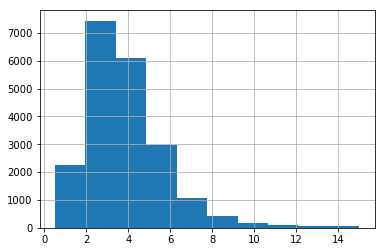

In [15]:
housing["median_income"].hist()
plt.show()

- 소득에 1.5로 나눈 값을 반올림 처리하고(소득 카테고리를 제한하기 위해), 5보다 큰 값에 대해서는 5
로 합치는 작업을 수행한다.

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64


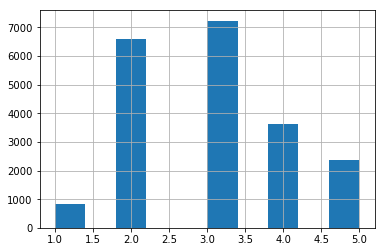

In [16]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

print(housing["income_cat"].value_counts())
housing["income_cat"].hist()
plt.show()

- 다음으로는 소득 카테고리 기반으로 계층화(stratified)된 샘플링을 수행할 준비가 됐다. Scikit-learn의 StratifiedShuffleSplit
클래스를 사용할 수 있다.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

### 3. Discover and Visualize the Data to Gain Insights

### 1) Visualizing Geographical Data
- 우리의 housing data는 경도와 위도를 가지고 있기 때문에, scatter 그래프는 좋은 아이디어로 사용 될 수 있다.



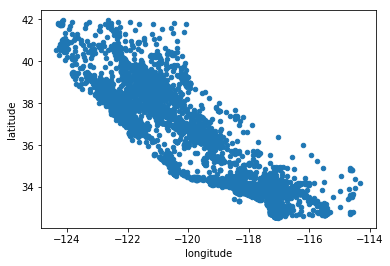

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

- 위의 그래프는 구분이 잘 되지 않아, 아래와 같이 alpha 값을 주면 시각적으로 보기 편해진다.

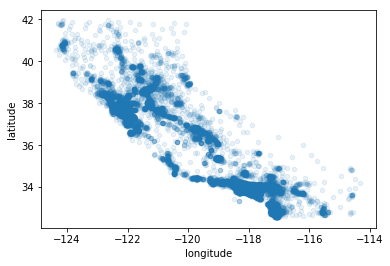

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

- 주택가격을 다시 살펴보자.
    - s : district의 인구에 대한 옵션 
    - o : 가격을 색으로 나타내기 위한 옵션
    - cmap : 미리 정의 된 color map
    - label은 legend를 위한 옵션
    
- jet는 파랑(낮은 값)색에서 빨강(높은 값)의 범위를 가지는 color map이다.

In [20]:
import matplotlib.pyplot as plt


housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

<img src="./figures/08.png" width=700/>

- 위의 이미지에서 볼 수 있듯이, 주택 가격은 인구밀도와, 지역과 많은 관련성(예를 들면, ocean과의 밀접)이 있다는 것을
확인할 수 있다. 이것은 클러스터링 알고리즘을 사용하여 주요 클러스터를 감지하고, 클러스터 센터의 근접성을 측정하
는 새로운 feature를 추가하는 데 있어 유용하게 적용 될 수 있다.